In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
dataset_li = ['Cora', 'Flickr', 'Polblogs']
seed_li = [1, 2, 3, 4]
gnn_li = ['gcn']

# FGA

## Coarsen_GCN

In [19]:
for gnn in gnn_li:
    df = pd.read_csv(f'./results/coarsen_{gnn}.csv')
    dataset = 'Cora'
    df = df[(df['dataset'] == dataset) & (df['coarsening_rate'] == 0.2125)].loc[:, ['seed', 'coarsening_rate', 'misclassification_rate', 'clean_acc_avg']]

    print(df)

    seed  coarsening_rate  misclassification_rate  clean_acc_avg
1      1           0.2125                   0.725       0.824346
19    15           0.2125                   0.725       0.809034
28     2           0.2125                   0.775       0.810000
55     3           0.2125                   0.825       0.820000
82     4           0.2125                   0.775       0.820000


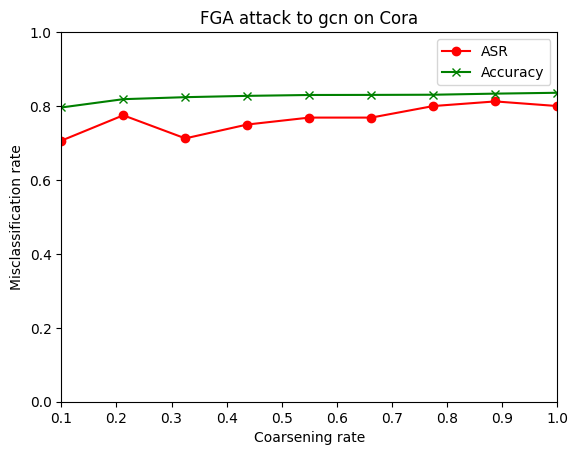

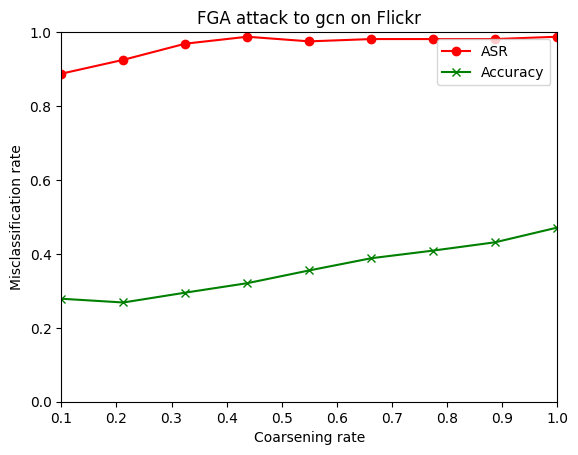

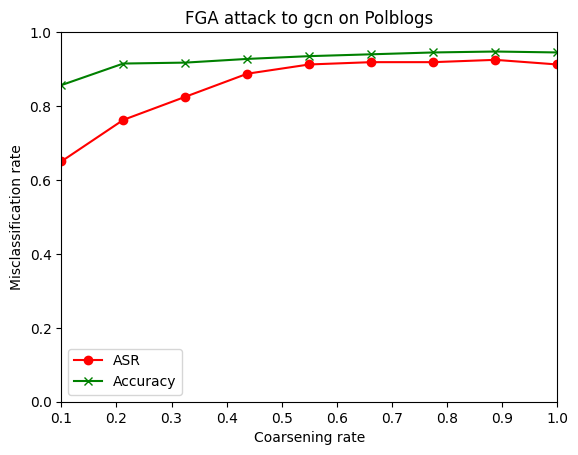

In [22]:
for gnn in gnn_li:
    df = pd.read_csv(f'./results/coarsen_{gnn}.csv')
    for dataset in dataset_li:
        asr_li = []
        acc_li = []
        for seed in seed_li:
            asr = df[(df['dataset'] == dataset) & (df['seed'] == seed)]['misclassification_rate'].values
            acc = df[(df['dataset'] == dataset) & (df['seed'] == seed)]['clean_acc_avg'].values
            asr_li.append(asr)
            acc_li.append(acc)
        asr_li = np.array(asr_li)
        acc_li = np.array(acc_li)
        
        avg_asr = np.mean(asr_li, axis=0)
        avg_acc = np.mean(acc_li, axis=0)
        
        x = df[(df['dataset'] == dataset) & (df['seed'] == seed)]['coarsening_rate']
        plt.plot(x, avg_asr, label='ASR', marker='o', c='r')
        plt.plot(x, avg_acc, label='Accuracy', marker='x', c='green')
        plt.xlabel('Coarsening rate')
        plt.ylabel('Misclassification rate')
        plt.xlim(0.1, 1.0)
        plt.ylim(0.0, 1.0)
        plt.title(f'FGA attack to {gnn} on {dataset}')
        plt.legend()
        plt.show()
        plt.close()